In [ ]:
import torch
import pandas as pd
from sklearn.datasets import load_iris

In [ ]:
#data load
iris = load_iris()


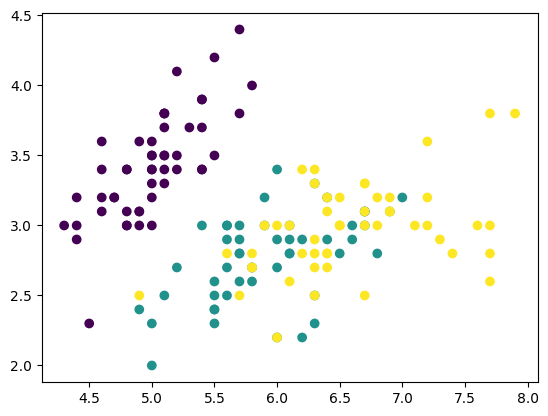

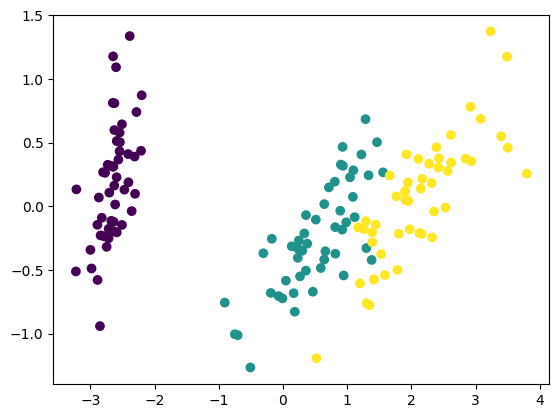

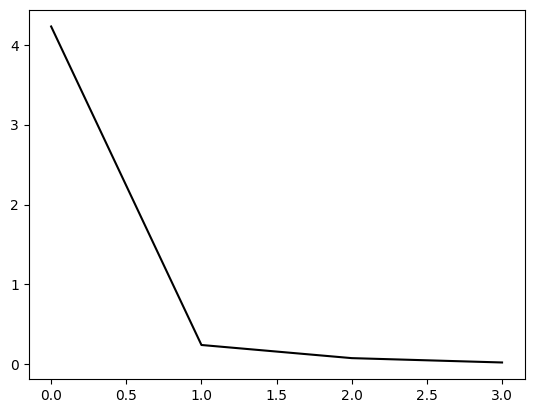

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


#데이터에 존재하는 성분의 개수
pca = PCA(n_components=4)

Y = pca.fit_transform(iris['data'])


pre = iris.data
plt.scatter(pre[:, 0], pre[:, 1], c = iris['target'])
plt.show()

plt.scatter(Y[: ,0], Y[:,1], c=iris['target'])
plt.show()


#분산도룰 확인하여 정보를 어떻게 설명할 수 있는 지
plt.plot(pca.explained_variance_, "-0")
plt.show()



L: [0.02367619 0.0776881  0.24105294 4.20005343]
Q: [[ 0.31548719  0.58202985  0.65658877 -0.36138659]
 [-0.3197231  -0.59791083  0.73016143  0.08452251]
 [-0.47983899 -0.07623608 -0.17337266 -0.85667061]
 [ 0.75365743 -0.54583143 -0.07548102 -0.3582892 ]]


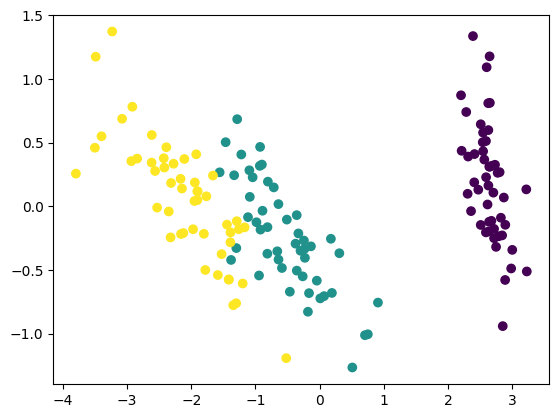

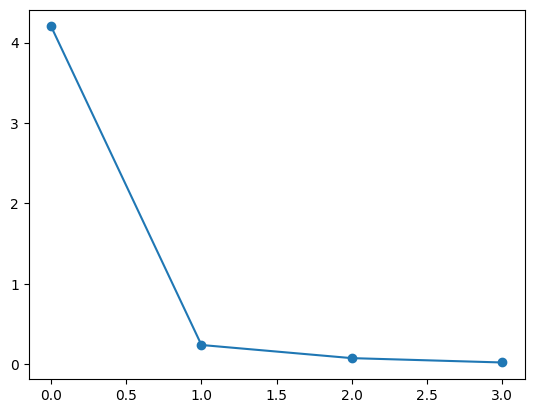

In [ ]:
from numpy import linalg
#PCA via EigenDecom

# M = Q ^ QT
X = iris.data
X = X- X.mean(axis = 0)

#covarinace matrix
C = (X.T @ X)/ X.shape[0]
#수가 클수록 관련이 높다
#eigen decmposition
#L은 람다 분산 Q는 주성분 벡터
L, Q = linalg.eigh(C)

#X @ Q는 새로운 Y

print("L:", L)
print("Q:", Q)


plt.scatter(X@Q[:,3], X @Q[:, 2], c=iris.target)
plt.show()

plt.plot(sorted(L, reverse=True), "-o")
plt.show()


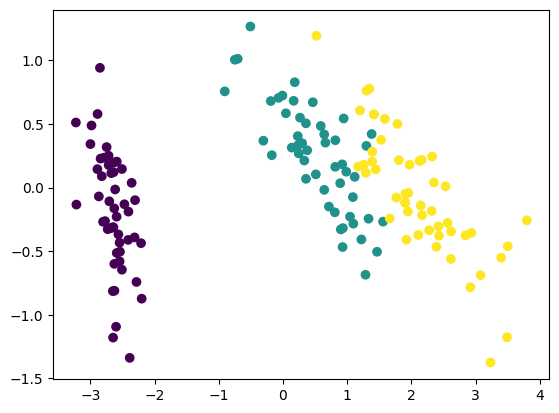

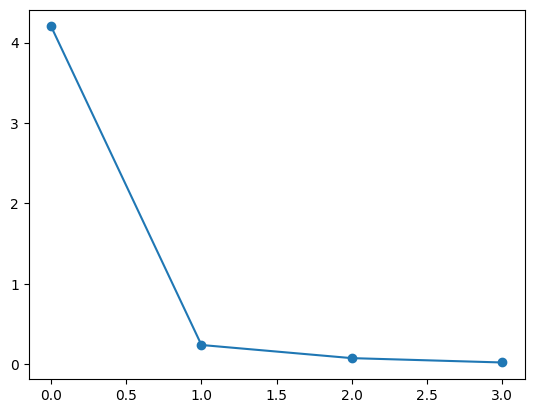

In [ ]:
#PCA via SVD

X = iris.data
X = X- X.mean(axis = 0)

#return unitary Array, descending order
U, S, VT = linalg.svd(X)
#Vt-> 주성분 # S 분산 값
Q = VT.T
y = X @ Q

print("U:", U)
print("S:", S)
print("VT:", VT)

plt.scatter(X@VT[0], X @VT[1], c=iris.target)
plt.show()

variances = (S ** 2) / X.shape[0]
plt.plot(variances, "-o")
plt.show()

In [ ]:
#power  method, return the largest lambda
import numpy as np


#공분산 행
C = (X.T @ X)/ X.shape[0]

#random으로 만듦
v = np.random.randn(C.shape[0], 1)
v = v/linalg.norm(v)

M = C.copy()

L = []
Q = []

for dim in range(4):
  for epoch in range(20):
    vp = M @ v
    #정규화 -> 분산 값
    lmd = linalg.norm(vp)
    vp = vp /lmd
    v = vp

    #첫 번째 egenvector value를 구함
  #새로운 M을 구함
  M = M - lmd*(v @ v.T)

  L.append(lmd)
  Q.append(v)

L = np.array(L)
Q = np.array(Q)

print("L:", L)
print("Q:", Q)

L: [4.20005343 0.24105294 0.0776881  0.02367619]
Q: [[[-0.36138659]
  [ 0.08452251]
  [-0.85667061]
  [-0.3582892 ]]

 [[-0.65658877]
  [-0.73016143]
  [ 0.17337266]
  [ 0.07548102]]

 [[ 0.58202985]
  [-0.59791083]
  [-0.07623608]
  [-0.54583143]]

 [[ 0.31548719]
  [-0.3197231 ]
  [-0.47983899]
  [ 0.75365743]]]
